C:\Users\acer\AppData\Local\Temp\ipykernel_10748\3417249285.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


MSE: 4244.330557112794
RMSE: 65.14852689902354
MAE: 46.48017676767677
R-squared: 0.9071836453304044


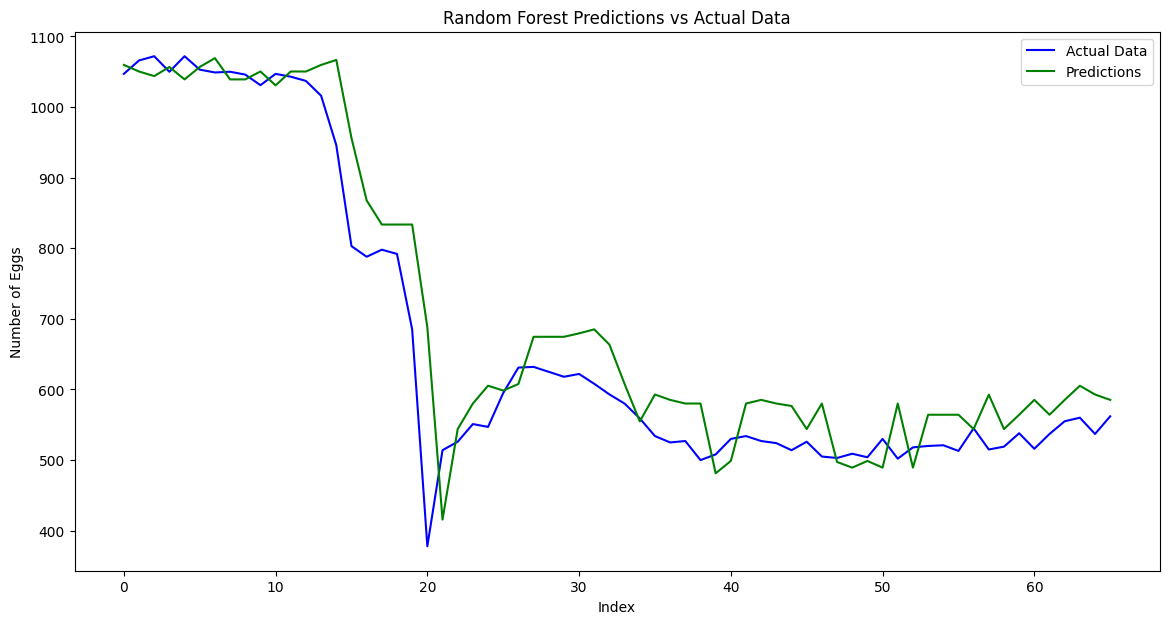

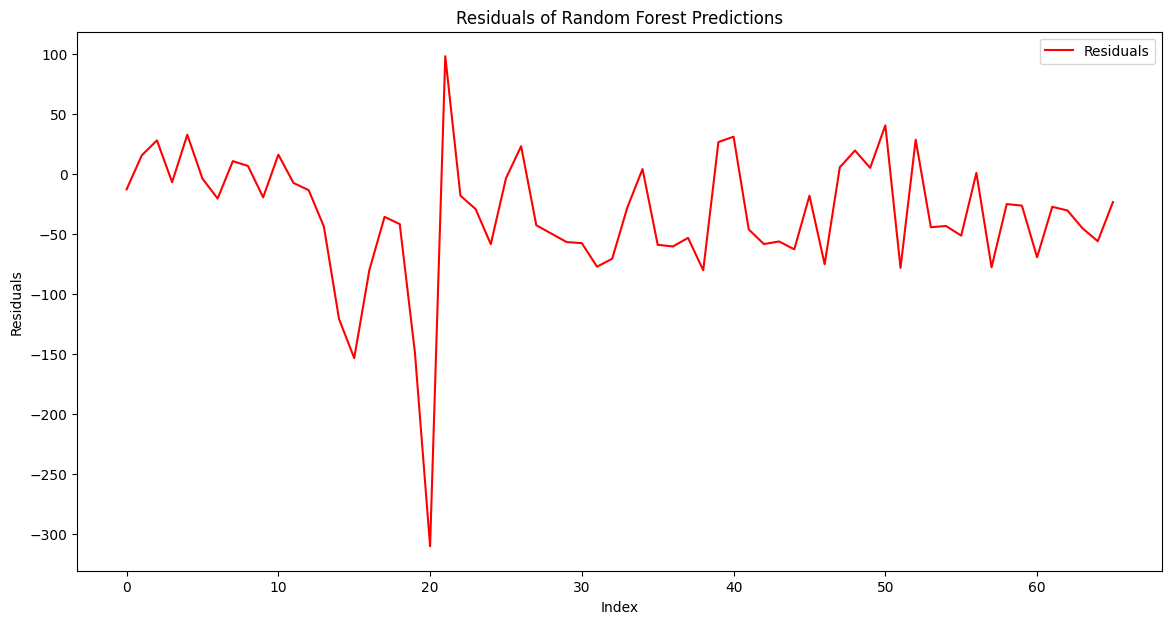

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the dataset
file_path = r'C:\Users\acer\Desktop\jupyter\DATA-OF-EGGS.csv'
df = pd.read_csv(file_path)

# Remove commas and convert to float
df['noeggs'] = df['noeggs'].astype(str).str.replace(',', '').astype(float)

# Create lag feature
df['lag_1'] = df['noeggs'].shift(1)

# Handle missing values
df.fillna(method='bfill', inplace=True)

# Define features and target
X = df[['lag_1']]  # Feature(s)
y = df['noeggs']   # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Data', color='blue')
plt.plot(predictions, label='Predictions', color='green')
plt.legend()
plt.title('Random Forest Predictions vs Actual Data')
plt.xlabel('Index')
plt.ylabel('Number of Eggs')
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(14, 7))
plt.plot(residuals.values, label='Residuals', color='red')
plt.title('Residuals of Random Forest Predictions')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()
